In [1]:
# Cài đặt các thư viện cần thiết
!pip install findspark
!pip install pyspark
!pip install matplotlib
!pip install pandas
!pip install setuptools
!apt-get update
!apt-get install python3-distutils

# Import các thư viện cần thiết
import findspark
import os

# Sửa đường dẫn SPARK_HOME
os.environ['SPARK_HOME'] = '/home/hadoop/spark'
findspark.init('/home/hadoop/spark')

from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.ml import *
from pyspark.ml.classification import *
from pyspark.ml.feature import *
from pyspark.ml.param import *
from pyspark.ml.tuning import *
from pyspark.ml.evaluation import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from packaging.version import Version as LooseVersion
from pyspark.sql import SparkSession


  Using cached py4j-0.10.9.7-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.5
    Uninstalling py4j-0.10.9.5:
      Successfully uninstalled py4j-0.10.9.5
Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [2]:
import sys
print(sys.executable)

/home/hadoop/thuhien/bin/python


In [3]:
#!pip uninstall py4j
!pip install py4j==0.10.9.5


  Using cached py4j-0.10.9.5-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyspark 3.5.3 requires py4j==0.10.9.7, but you have py4j 0.10.9.5 which is incompatible.


In [4]:
import findspark
print(findspark.__file__)

/home/hadoop/thuhien/lib/python3.12/site-packages/findspark.py


In [5]:
import pyspark
print(pyspark.__version__)

3.5.3


In [6]:
sc = SparkContext()
sqlContext = SQLContext(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/09 12:45:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/home/hadoop/spark/python/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [7]:
# import os

# # Đường dẫn thư mục cần kiểm tra
# path = 'mini_newsgroups'

# if os.path.exists(path):
#     print(f"Nội dung trong thư mục '{path}':")
#     for item in os.listdir(path):
#         print(item)
# else:
#     print(f"Đường dẫn '{path}' không tồn tại.")



In [8]:
data = []
topic2id = dict()
i=0
# Cập nhật đường dẫn đến thư mục mini_newsgroups
path_to_newsgroups = '/home/hadoop/Downloads/mini_newsgroups'  # Thay đổi đường dẫn cho phù hợp

for topic in os.listdir(path_to_newsgroups):
#for topic in os.listdir('mini_newsgroups'):
    topic2id[topic] = i
    i += 1
    for doc in os.listdir('/home/hadoop/Downloads/mini_newsgroups/' + topic):
        with open('/home/hadoop/Downloads/mini_newsgroups/' + topic + '/' + doc, encoding='ISO-8859-1') as f:
            # Thực hiện các thao tác với tệp
            content = f.read()  # Đọc nội dung tệp
            print(content)      # In nội dung tệp

            data.append([content, topic, topic2id[topic]])
# Convert text data to pandas dataframe
df = pd.DataFrame(data, columns=['doc', 'topic', 'label'])

Newsgroups: talk.politics.mideast
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!gatech!howland.reston.ans.net!zaphod.mps.ohio-state.edu!darwin.sura.net!cos!cos!bob1
From: bob1@cos.com (Bob Blackshaw)
Subject: Re: was:Go Hezbollah!!
Message-ID: <bob1.734891153@cos>
Organization: Corporation for Open Systems
References: <1993Apr14.152612.19076@unocal.com> <C5I7J7.F7A@eis.calstate.edu>
Distribution: world 
Date: Thu, 15 Apr 1993 16:25:53 GMT
Lines: 60

In <C5I7J7.F7A@eis.calstate.edu> mafifi@eis.calstate.edu (Marc A Afifi) writes:

>stssdxb@st.unocal.com (Dorin Baru) writes:
>> Even the most extemist, one sided (jewish/israeli) postings (with which I 
>> certainly disagree), did not openly back plain murder. You do.
>> 
>> The 'Lebanese resistance' you are talking about is a bunch of lebanese 
>> farmers who detonate bombs after work, or is an organized entity of not-
>> only-lebanese well trained mercenaries ? I do not know, just curious.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
topic2id

{'talk.politics.mideast': 0,
 'sci.med': 1,
 'talk.politics.misc': 2,
 'sci.electronics': 3,
 'sci.space': 4,
 'alt.atheism': 5,
 'misc.forsale': 6,
 'comp.graphics': 7,
 'soc.religion.christian': 8,
 'talk.religion.misc': 9,
 'comp.os.ms-windows.misc': 10,
 'rec.sport.hockey': 11,
 'talk.politics.guns': 12,
 'comp.windows.x': 13,
 'rec.sport.baseball': 14,
 'rec.autos': 15,
 'sci.crypt': 16,
 'comp.sys.mac.hardware': 17,
 'comp.sys.ibm.pc.hardware': 18,
 'rec.motorcycles': 19}

In [10]:
#Tạo ngẫu nhiên khoảng 80% tập huấn luyện và 20% tập kiểm thử:
msk = np.random.rand(len(df)) <= 0.8
training = df[msk]
testing = df[~msk]

In [11]:
training

,doc,topic,label
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,0
2,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,0
3,Xref: cantaloupe.srv.cs.cmu.edu alt.conspiracy...,talk.politics.mideast,0
5,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,0
6,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,0
...,...,...,...
1995,Newsgroups: rec.motorcycles\nPath: cantaloupe....,rec.motorcycles,19
1996,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,rec.motorcycles,19
1997,Newsgroups: rec.motorcycles\nPath: cantaloupe....,rec.motorcycles,19
1998,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,rec.motorcycles,19


In [12]:
testing

,doc,topic,label
1,Xref: cantaloupe.srv.cs.cmu.edu misc.headlines...,talk.politics.mideast,0
4,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,0
9,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,0
20,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,0
24,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,0
...,...,...,...
1983,Newsgroups: rec.motorcycles\nPath: cantaloupe....,rec.motorcycles,19
1984,Newsgroups: rec.motorcycles\nPath: cantaloupe....,rec.motorcycles,19
1988,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,rec.motorcycles,19
1989,Newsgroups: rec.motorcycles\nPath: cantaloupe....,rec.motorcycles,19


In [13]:
#Tạo các DataFrame của Spark từ DataFrame của Pandas:
training_data = sqlContext.createDataFrame(training)
testing_data = sqlContext.createDataFrame(testing)

In [14]:
# pip install pyspark

In [15]:
import sys
print(sys.path)

['/home/hadoop/spark/python', '/tmp/spark-33180ed5-6363-45e7-9ace-feb4ccc5a8cf/userFiles-b0ee80c0-bd87-4512-ab47-dc7422deb0da', '/home/hadoop/spark/python/lib/py4j-0.10.9.5.zip', '/home/hadoop/spark/python', '/home/hadoop/spark/python/lib/py4j-0.10.9.5.zip', '/home/hadoop', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/hadoop/thuhien/lib/python3.12/site-packages', '/home/hadoop/thuhien/lib/python3.12/site-packages/setuptools/_vendor']


In [16]:
# pip install --upgrade py4j

In [17]:
pip show py4j

Name: py4j
Version: 0.10.9.5
Summary: Enables Python programs to dynamically access arbitrary Java objects
Home-page: https://www.py4j.org/
Author: Barthelemy Dagenais
Author-email: barthelemy@infobart.com
License: BSD License
Location: /home/hadoop/thuhien/lib/python3.12/site-packages
Requires: 
Required-by: pyspark
Note: you may need to restart the kernel to use updated packages.


In [18]:
import sys
print(sys.path)

['/home/hadoop/spark/python', '/tmp/spark-33180ed5-6363-45e7-9ace-feb4ccc5a8cf/userFiles-b0ee80c0-bd87-4512-ab47-dc7422deb0da', '/home/hadoop/spark/python/lib/py4j-0.10.9.5.zip', '/home/hadoop/spark/python', '/home/hadoop/spark/python/lib/py4j-0.10.9.5.zip', '/home/hadoop', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/hadoop/thuhien/lib/python3.12/site-packages', '/home/hadoop/thuhien/lib/python3.12/site-packages/setuptools/_vendor']


In [19]:
training_data.show()

24/10/09 12:45:36 WARN TaskSetManager: Stage 0 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------------------+-----+
|                 doc|               topic|label|
+--------------------+--------------------+-----+
|Newsgroups: talk....|talk.politics.mid...|    0|
|Newsgroups: talk....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Newsgroups: talk....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Path: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Newsgroups: talk....|talk.politics.mid...|    0|
|Newsgroups: talk....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Newsgroups: talk....|talk.politics.mid...|    0|
|Path: cantaloupe....|talk.politics.mid...|    0|
|Nntp-Posting-Host...|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|


In [20]:
testing_data.show()

+--------------------+--------------------+-----+
|                 doc|               topic|label|
+--------------------+--------------------+-----+
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Path: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Newsgroups: talk....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Newsgroups: talk....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Newsgroups: talk....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Xref: cantaloupe....|talk.politics.mid...|    0|
|Path: cantaloupe....|talk.politics.mid...|    0|


24/10/09 12:45:46 WARN TaskSetManager: Stage 2 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.


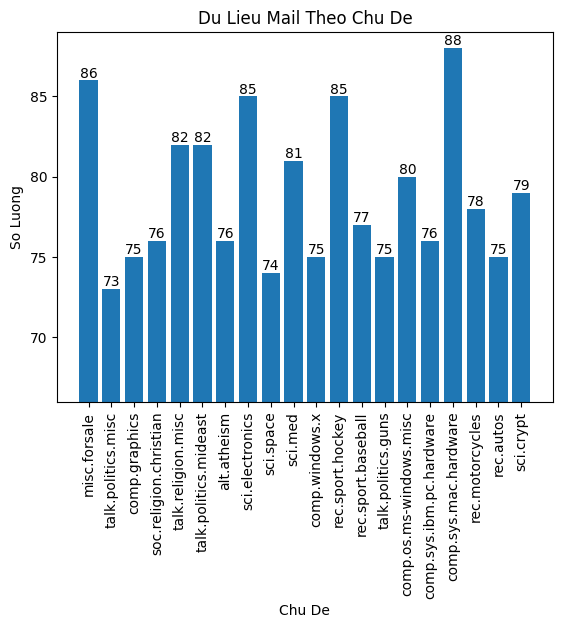

In [21]:
#Phân bố số lượng văn bản trong các chủ đề thuộc tập huấn luyện:
topic_dist = training_data.groupBy("topic").count()
fig, ax = plt.subplots(1)
topic_dict = dict()
x = []
y=[]
labels = []
i=0
for topic in topic_dist.collect():
    x.append(i)
    i+= 1
    labels.append(topic[0])
    y.append(topic[1])
ax.bar(x, y)
ax.set_xlabel("Chu De")
ax.set_ylabel("So Luong")
ax.set_title("Du Lieu Mail Theo Chu De")
plt.xticks(x, labels, rotation='vertical')
low = min(y)
high= max(y)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.01*(high-low))])

rects = ax.patches
#Now make some labels
for rect, y_i in zip(rects, y):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, y_i, ha='center', va='bottom')
plt.show()

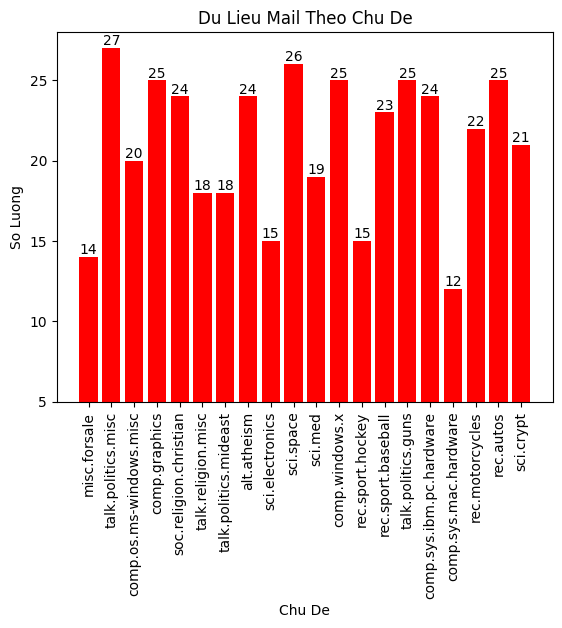

In [22]:
#Phân bố số lượng văn bản trong các chủ đề thuộc tập kiểm thử:
topic_dist = testing_data.groupBy("topic").count()
fig, ax = plt.subplots(1)
topic_dict = dict()
x = []
y = []
labels = []
i=0
for topic in topic_dist.collect():
    x.append(i)
    i+= 1
    labels.append(topic[0])
    y.append(topic[1])
ax.bar(x, y, color='r')
ax.set_xlabel("Chu De")
ax.set_ylabel("So Luong")
ax.set_title("Du Lieu Mail Theo Chu De")
plt.xticks(x, labels, rotation='vertical')
low = min(y)
high=max(y)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.01*(high-low))])

rects = ax.patches
#Now make some labels
for rect, y_i in zip(rects, y):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, y_i, ha='center', va='bottom')
plt.show()

In [23]:
#Tiền xử lý các văn bản sử dụng, sử dụng Logistic Regression để huấn luyện và đưa vào Pipeline:
tokenizer = RegexTokenizer(inputCol="doc", outputCol="words", pattern="s+")
remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="words")
hashingTF = HashingTF (inputCol=remover.getOutputCol(), outputCol="features", numFeatures=5000)
lr = LogisticRegression(maxIter=20, regParam=0.1)

pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])


In [24]:
model = pipeline.fit(training_data)

24/10/09 12:46:01 WARN TaskSetManager: Stage 8 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:46:15 WARN TaskSetManager: Stage 9 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:46:18 WARN TaskSetManager: Stage 10 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:46:19 WARN TaskSetManager: Stage 11 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:46:20 WARN TaskSetManager: Stage 12 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:46:22 WARN TaskSetManager: Stage 13 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:46:25 WARN TaskSetManager: Stage 14 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09

In [25]:
predictions = model.transform(training_data)

In [26]:
results = predictions.rdd.takeSample(False, 10, seed=0)
selected_results = []
for result in results:
    selected_results.append([result[0], result[1], result[2], result[-1]])
result_df = pd.DataFrame(selected_results, columns=["doc","topic","label","prediction"])

24/10/09 12:46:52 WARN TaskSetManager: Stage 31 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:46:58 WARN TaskSetManager: Stage 32 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.


In [27]:
result_df

,doc,topic,label,prediction
0,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.je...,talk.politics.mideast,0,0.0
1,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.w...,misc.forsale,6,6.0
2,Newsgroups: comp.os.ms-windows.misc\nPath: can...,comp.os.ms-windows.misc,10,10.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,rec.sport.baseball,14,14.0
4,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,rec.sport.hockey,11,11.0
5,Newsgroups: rec.motorcycles\nPath: cantaloupe....,rec.motorcycles,19,19.0
6,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.ibm.p...,comp.sys.ibm.pc.hardware,18,18.0
7,Newsgroups: misc.forsale\nPath: cantaloupe.srv...,misc.forsale,6,6.0
8,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,soc.religion.christian,8,8.0
9,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,sci.electronics,3,3.0


In [30]:
#Danh gia mo hinh bang do do Accuracy
evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol = "prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

24/10/09 12:48:47 WARN TaskSetManager: Stage 33 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.


In [31]:
#Tren tap huan luyen
accuracy

0.9968314321926489

In [32]:
#Tren tap kiem thu
evaluator.evaluate(model.transform(testing_data))

0.7985781990521327

In [33]:
#TUNING TRONG MLLIB
#Dung cross-valididation voi k-folds=2
paramGrid = ParamGridBuilder().addGrid(hashingTF.numFeatures, [2000,5000,8000]).addGrid(lr.regParam, [0.00, 0.01, 0.1]).build()

#CREATE A CROSS
cv = CrossValidator(estimator = pipeline, evaluator = evaluator, estimatorParamMaps = paramGrid, numFolds =2)

In [34]:
cvModel = cv.fit(training_data)

24/10/09 12:49:14 WARN TaskSetManager: Stage 37 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:49:16 WARN TaskSetManager: Stage 38 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:49:17 WARN TaskSetManager: Stage 39 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:49:18 WARN TaskSetManager: Stage 40 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:49:18 WARN TaskSetManager: Stage 41 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:49:18 WARN TaskSetManager: Stage 42 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/09 12:49:18 WARN TaskSetManager: Stage 43 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.
24/10/

In [35]:
#Tren tap huan luyen
evaluator.evaluate(cvModel.transform(training_data))

24/10/09 12:52:50 WARN TaskSetManager: Stage 552 contains a task of very large size (2118 KiB). The maximum recommended task size is 1000 KiB.


0.9968314321926489

In [36]:
#Tren tap kiem thu
evaluator.evaluate(cvModel.transform(testing_data))

0.8104265402843602